# Clustering and Fitting (40%)
##  Applied Data Science 1
### Module Leader: Dr. William Cooper

### Importing Important Libraries 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix
from sklearn.metrics import confusion_matrix 
from scipy.stats import pearsonr
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

## Data Preparation

In [2]:
# Data Preparation: Read the CSV file into a DataFrame 
df = pd.read_csv("breast-cancer.csv").dropna()


In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Show all the columns in the head of the DataFrame
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Understanding the data using describe 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

 There are 569 rows and 32 columns in the dataset


### Cleaning Data 

In [6]:
# Remove the empty entiries
df = df.dropna()

In [7]:
# Check the change if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.corr(numeric_only=True)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Statistical Treatment on Data

In [9]:
# Statistics on DataFrame
# Mean, Median, Standard Deviation etc
def major_statistics():

    # mean and median:
    mean_value = df.mean(numeric_only=True)
    median_value = df.median(numeric_only=True)

    # standard deviation
    std_deviation = df.std(numeric_only=True)
    
    skewness = df.skew(numeric_only=True)
    kurtosis = df.kurt(numeric_only=True)

    print("\033[1mMean:\n\033[0m", mean_value)
    print("\n\033[1mMedian:\n\033[0m", median_value)
    print("\n\033[1mStandard Deviation:\n\033[0m", std_deviation)
    print("\n\033[1mSkewness:\n\033[0m", skewness)
    print("\n\033[1mKurtosis:\n\033[0m", kurtosis)
    return

In [10]:
major_statistics()

Mean:
 id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.8058

In [11]:
# Calculate the skewness for each column
skewness_values = df.skew(numeric_only=True)

# Print the skewness values
print("Skewness values")
print(skewness_values)

Skewness values
id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_wo

In [12]:
# Calculate the kurtosis for each column
kurtosis_values = df.kurtosis(numeric_only=True)

# Print the kurtosis values
print("Kurtosis values")
print(kurtosis_values)

Kurtosis values
id                         42.193194
radius_mean                 0.845522
texture_mean                0.758319
perimeter_mean              0.972214
area_mean                   3.652303
smoothness_mean             0.855975
compactness_mean            1.650130
concavity_mean              1.998638
concave points_mean         1.066556
symmetry_mean               1.287933
fractal_dimension_mean      3.005892
radius_se                  17.686726
texture_se                  5.349169
perimeter_se               21.401905
area_se                    49.209077
smoothness_se              10.469840
compactness_se              5.106252
concavity_se               48.861395
concave points_se           5.126302
symmetry_se                 7.896130
fractal_dimension_se       26.280847
radius_worst                0.944090
texture_worst               0.224302
perimeter_worst             1.070150
area_worst                  4.396395
smoothness_worst            0.517825
compactness_worst     

In [13]:
def calculate_kurtosis_skewness_for_columns(dataframe, columns):
    """
    Calculate kurtosis and skewness for specified numeric columns in a pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The dataframe to calculate kurtosis and skewness for.
    columns (list): A list of column names for which to calculate kurtosis and skewness.

    Returns:
    pd.DataFrame: A DataFrame with kurtosis and skewness for the specified columns.
    """
    kurtosis = dataframe[columns].kurtosis()
    skewness = dataframe[columns].skew()

    result_df = pd.DataFrame({'Kurtosis': kurtosis, 'Skewness': skewness})
    return result_df

# To use this function, first identify the numeric columns in your DataFrame.
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Then call the function with these columns
kurtosis_skewness_for_numeric_columns = calculate_kurtosis_skewness_for_columns(df, numeric_columns)

In [14]:
kurtosis_skewness_for_numeric_columns

,Kurtosis,Skewness
id,42.193194,6.473752
radius_mean,0.845522,0.942380
texture_mean,0.758319,0.650450
perimeter_mean,0.972214,0.990650
area_mean,3.652303,1.645732
smoothness_mean,0.855975,0.456324
compactness_mean,1.650130,1.190123
concavity_mean,1.998638,1.401180
concave points_mean,1.066556,1.171180
symmetry_mean,1.287933,0.725609


# Data Visualization

## Relational Graph
## 1- Scatter Plot

In [15]:
def plot_scatterplot(df):
    """
    Create a relational graph (scatter plot) for the breast cancer dataset.

    """  
    # Creating scatter plot
    plt.figure(figsize=(10, 6))

    markers = {"M": "s", "B": "X"}
    sns.scatterplot(x='radius_mean', y='texture_mean', data=df, hue='diagnosis', palette="deep", style="diagnosis", markers=markers)
    
    # Adding Title
    plt.title('Scatter Plot of Radius Mean vs. Texture Mean', fontsize=14)

    # Formatting axis labels
    plt.xlabel('radius_mean', fontsize=14)
    plt.ylabel('texture_mean', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Adding legend
    plt.legend(title='Diagnosis', fontsize=14)
    
    # Saving and displaying the plot
    plt.savefig('BreastCancerScatterPlot.png', dpi=600)

    plt.grid()
    plt.show()
    return


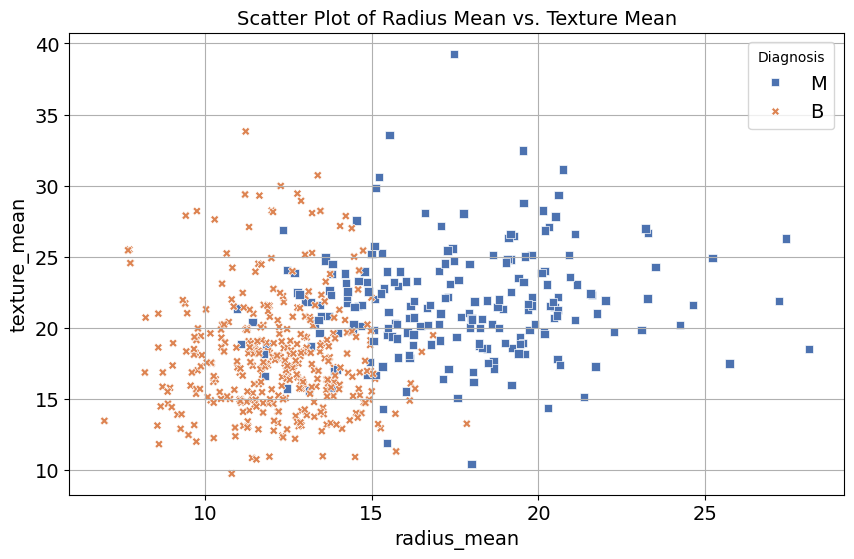

In [16]:
plot_scatterplot(df)

## 2- Line Plot

In [17]:
def plot_mean_area_by_diagnosis(df):
    """
    Create a line plot to visualize the mean area by diagnosis in the breast cancer dataset.
    
    """   
    plt.figure(figsize=(10, 6))
    
    # Calculating mean area by diagnosis
    mean_area_by_diagnosis = df.groupby('diagnosis')['area_mean'].mean()
    
    # Plotting line plot
    mean_area_by_diagnosis.plot(kind='line')
    
    # Adding title and labels
    plt.title('Area Mean by Diagnosis' , fontsize=14)
    plt.ylabel('area_mean' , fontsize=14)
    plt.xlabel('Diagnosis' , fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Setting x-axis ticks and labels
    plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])

    # Saving and displaying the plot
    plt.savefig('LinePlot.png', dpi=600)
    
    # Displaying the plot
    plt.show()
    return


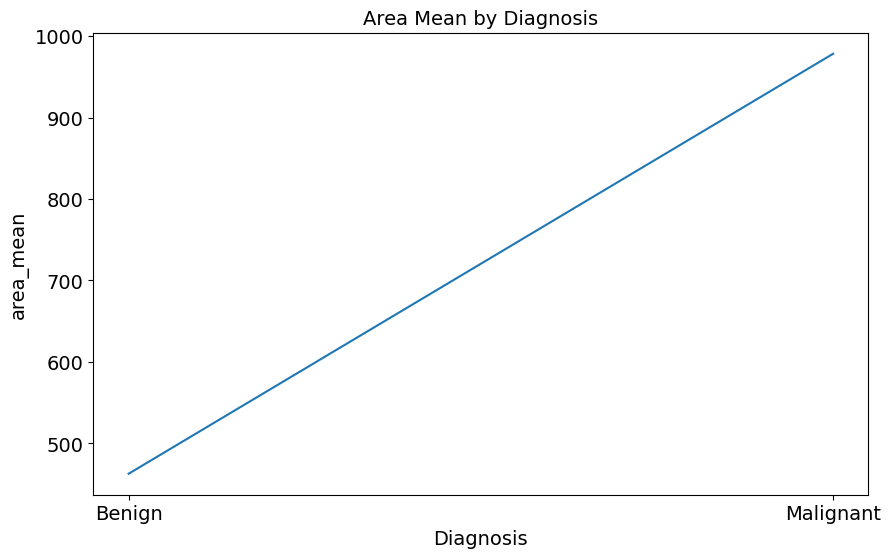

In [18]:
plot_mean_area_by_diagnosis(df)

# Categorical Graph

## 3- Histogram Plot

#### A kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:

In [19]:
# Plot of Histogram graph 
def area_mean_distribution_plot():
    """
    Function to create a Histogram for finding frequency of 'area_mean' feature in the breast cancer dataset.
    """
    plt.figure(figsize=(10, 6))

    sns.histplot(df['area_mean'], kde=True, color='orange' , bins=20)   
    plt.title('Distribution of Area Mean', fontsize=14)
    plt.xlabel('Mean Area', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Save the plot as an image
    plt.savefig('DistributionPlot.png', dpi=600)
    plt.show()
    return


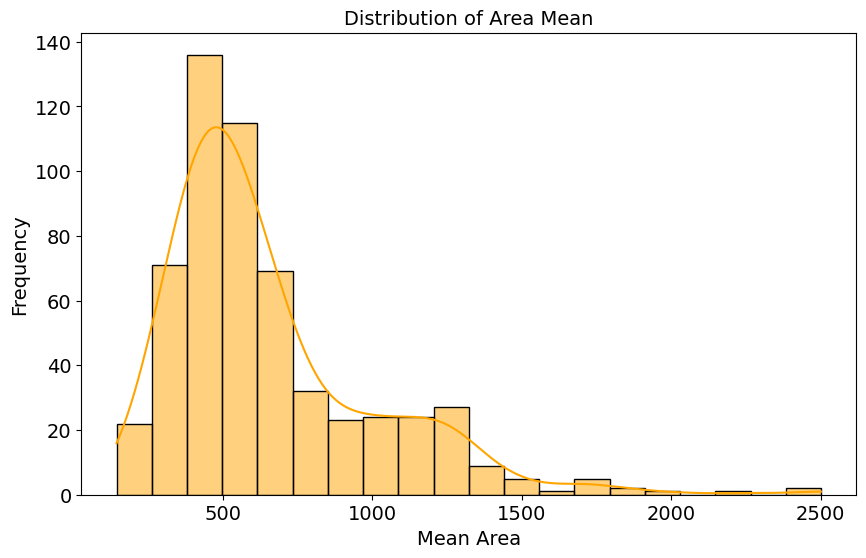

In [20]:
area_mean_distribution_plot()

## 4-Bar Plot

In [21]:
def plot_diagnosis_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(df['diagnosis'], palette='deep')
    plt.title('Distribution of Diagnosis (B = Benign, M = Malignant)' , fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Count' , fontsize=14)
    plt.ylabel('diagnosis' , fontsize=14)
    plt.savefig('BarPlot.png', dpi=600)
    plt.show()
    return

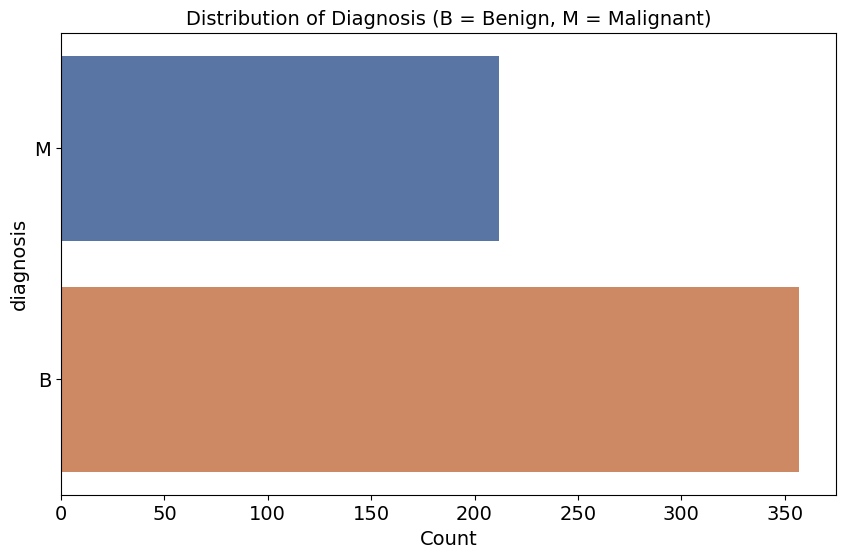

In [22]:
plot_diagnosis_distribution(df)

## 5- Bar Chart

In [23]:
# Bar Chart
def plot_mean_feature_values_by_diagnosis(df, features_to_scale):
    """
    Create a bar chart to visualize the mean feature values by diagnosis in the breast cancer dataset.
    """
    # Group the data by diagnosis and calculate the mean for each feature
    mean_features = df.groupby('diagnosis').mean()
    
    # Filter mean features for the selected features_to_scale
    mean_features = mean_features[features_to_scale]
    
    # Plotting the bar chart
    mean_features.plot(kind='bar', figsize=(10, 6))
    
    # Adding titles and labels
    plt.title('Mean Feature Values by Diagnosis' , fontsize=14)
    plt.ylabel('Mean Value' , fontsize=14)
    plt.xlabel('Diagnosis (Malignant and Benign)' , fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('plot_mean_feature_values_by_diagnosis.png', dpi=600)
    plt.show()
    return

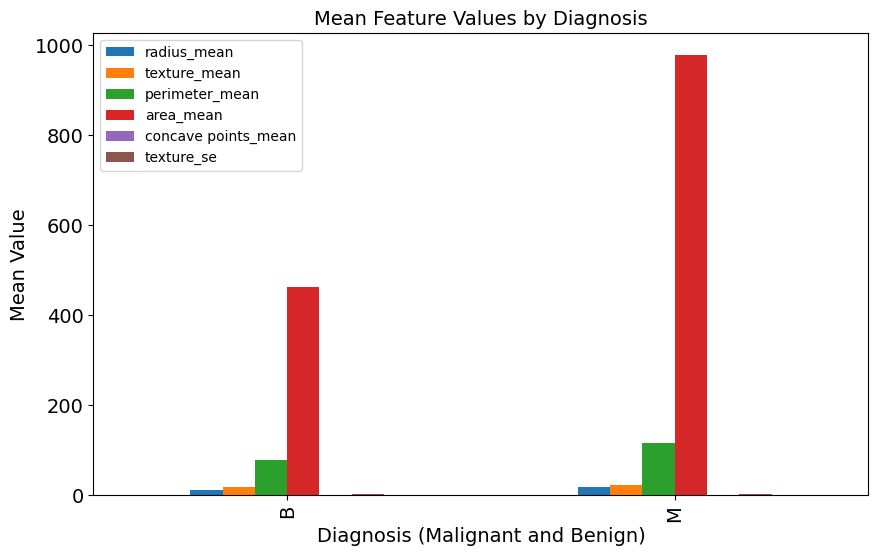

In [24]:
features_to_scale = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'texture_se']
plot_mean_feature_values_by_diagnosis(df, features_to_scale)

# Statistical Graph

## 6- Heat Map from Correation Matrix

In [25]:
def plot_correlation_heatmap(df):
    """
    Plot a heatmap of the correlation matrix for selected features.
    
    Args:
        df (DataFrame): The DataFrame containing the dataset.
        features_to_select (list): List of feature names to select.
    """
    # Select only the desired features from the DataFrame
    features_to_select = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst' , 'smoothness_mean' , 'compactness_mean']
    selected_df = df[features_to_select]

    # Compute the correlation matrix for the selected features
    correlation_matrix = selected_df.corr()

    # Plot the heatmap of the correlation matrix
    fig, ax = plt.subplots(dpi=144)
    mask = np.triu(np.ones_like(correlation_matrix))
    sns.heatmap(correlation_matrix, ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title('Correlation Heatmap', fontsize=14)
    plt.savefig('Correlation Heatmap.png', dpi=600)
    plt.tight_layout()

    plt.show()
    return


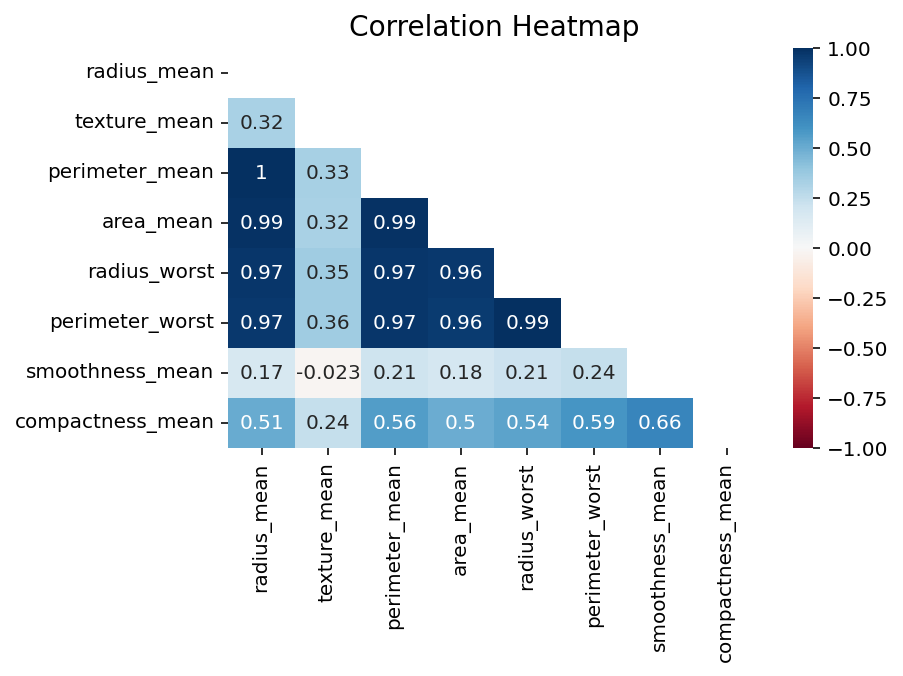

In [26]:
plot_correlation_heatmap(df)

### We could look at radius_mean versus texture_mean as that is not *too* highly correlated.

## 7- Confusion Matrix

In [27]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap='RdPu'):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

def plot_confusion_matrix_for_diagnosis(df, cmap='RdPu'):
    cm = confusion_matrix(df['diagnosis'], df['diagnosis'])
    plt.figure(figsize=(10, 6))
    plot_confusion_matrix(cm, classes=['Benign', 'Malignant'], cmap=cmap)
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.savefig('Confusion_matrix.png', dpi=600)
    plt.tight_layout()
    plt.show()
    return


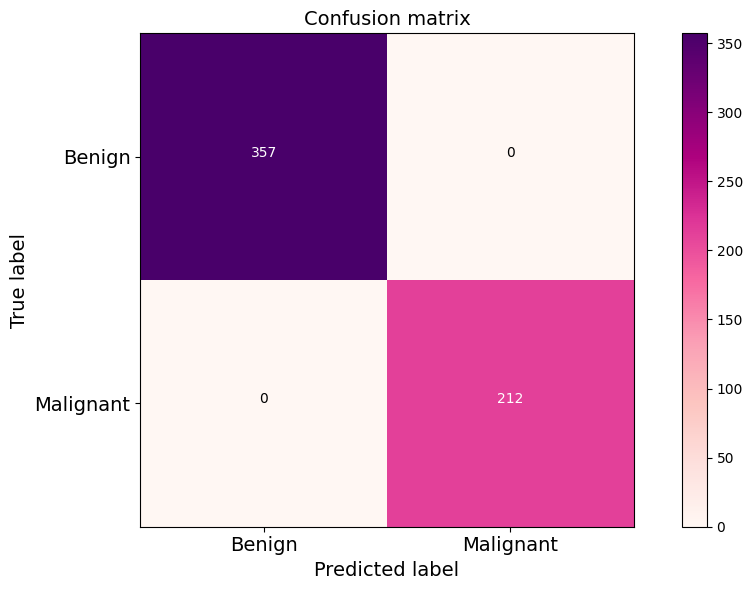

In [28]:
plot_confusion_matrix_for_diagnosis(df)

## 8- Pairplot

In [29]:
def plot_pairplot(df):
    """
    Plot pairplot for selected features.
    
    Args:
        df (DataFrame): The DataFrame containing the dataset.
        features_to_select (list): List of feature names to select.
    """
    # Assuming df DataFrame and features_to_select is a list of feature names
    features_to_select = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']

    # Select only the desired features from the DataFrame
    selected_df = df[features_to_select]
    
    # Plot pairplot
    sns.pairplot(selected_df, corner=True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.savefig('Pairplot.png', dpi=600)
    plt.tight_layout()
    plt.show()
    return


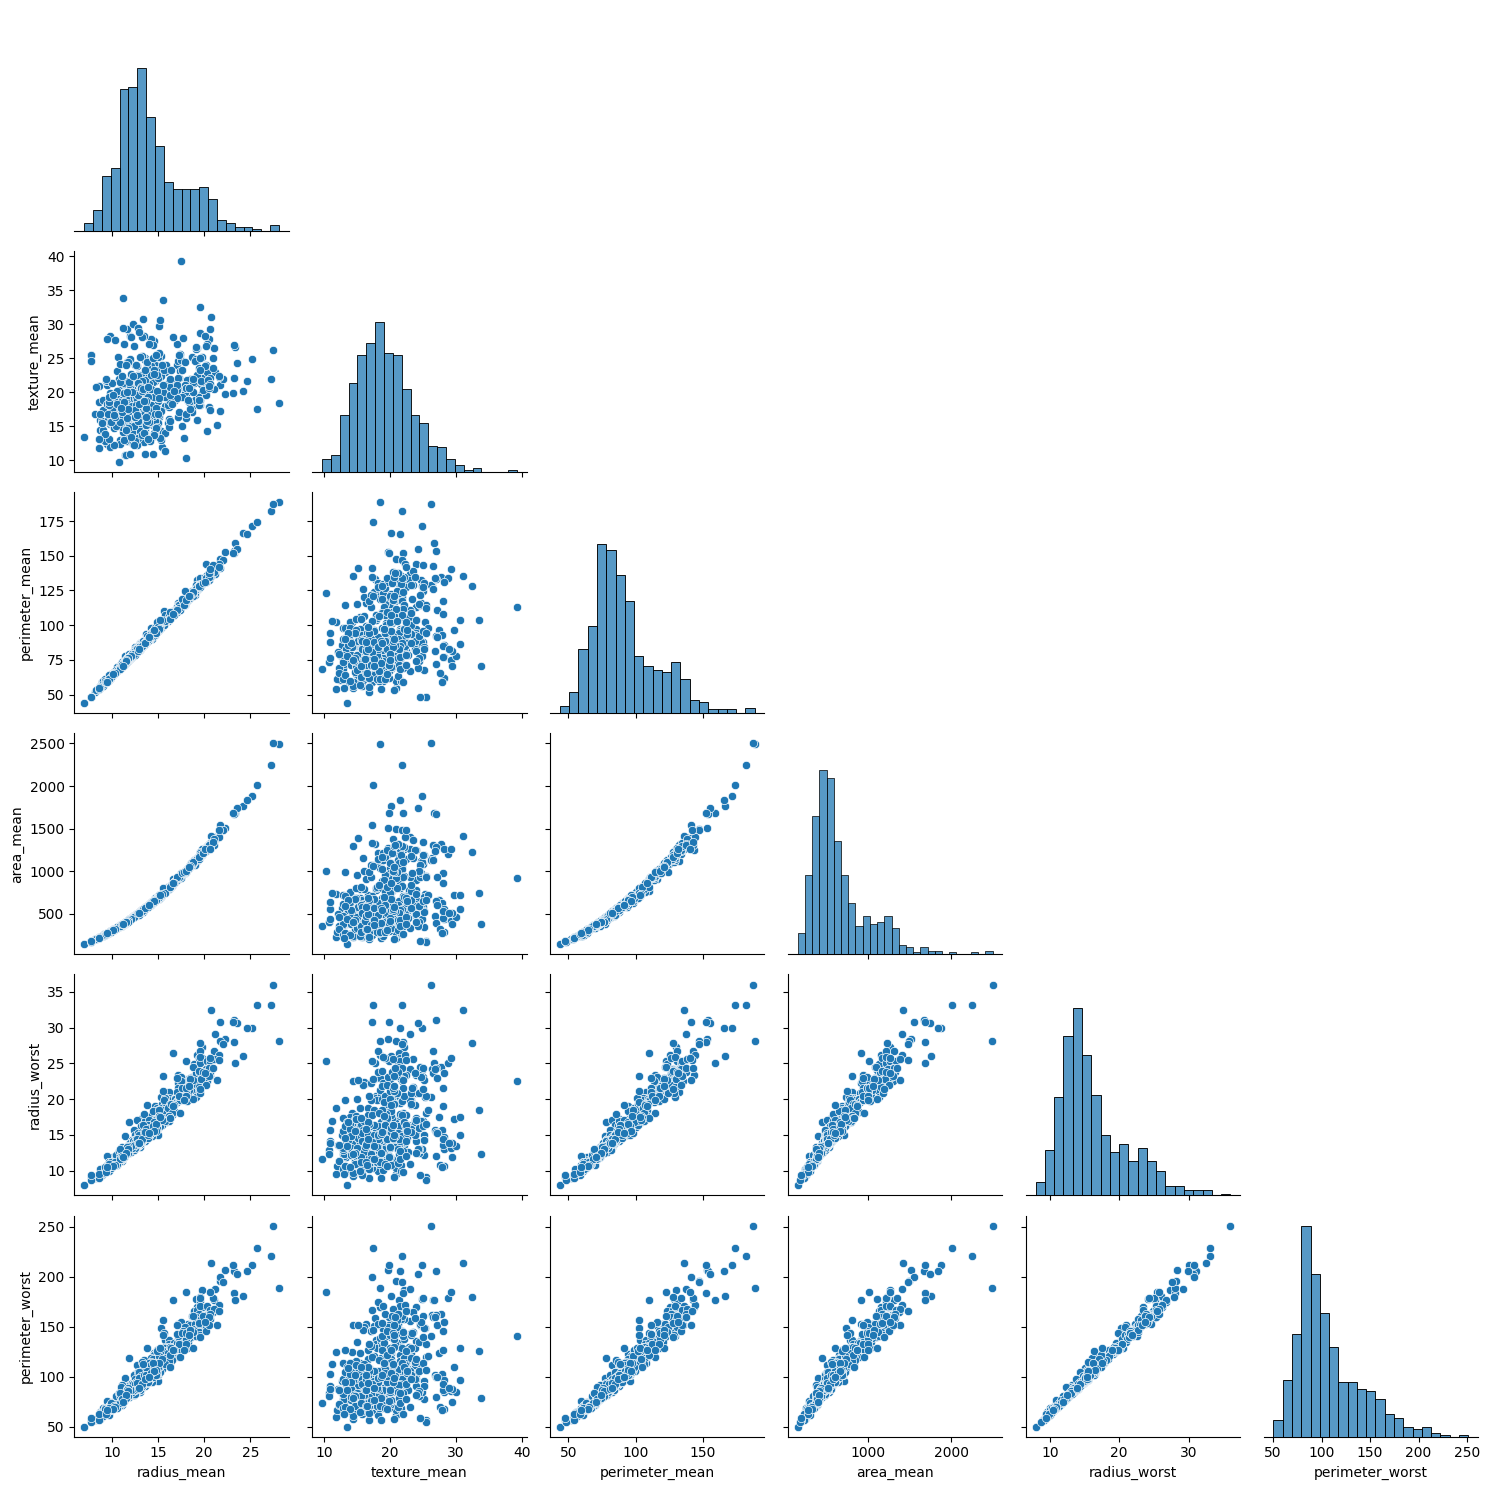

In [30]:
plot_pairplot(df)

# Clustering

In [31]:
# make some clustered data
# define centres 
centres = np.array([[-1., 0.], [1., -0.5], [0., 1.],])
xcent = centres[:, 0]
ycent = centres[:, 1]
# Points are normal distibuted around the centres.
xy, nclust = make_blobs(1000, centers=centres, cluster_std=0.3)
x = xy[:,0]
y = xy[:,1]

In [32]:
from sklearn.preprocessing import StandardScaler

# Normalize features
df_clust = df[['radius_mean', 'texture_mean']].copy()  
scaler = StandardScaler()
norm = scaler.fit_transform(df_clust)

 2 clusters silhoutte score = 0.44
 3 clusters silhoutte score = 0.41
 4 clusters silhoutte score = 0.34
 5 clusters silhoutte score = 0.34
 6 clusters silhoutte score = 0.34
 7 clusters silhoutte score = 0.35
 8 clusters silhoutte score = 0.35
 9 clusters silhoutte score = 0.34
10 clusters silhoutte score = 0.34
Best number of clusters =  2


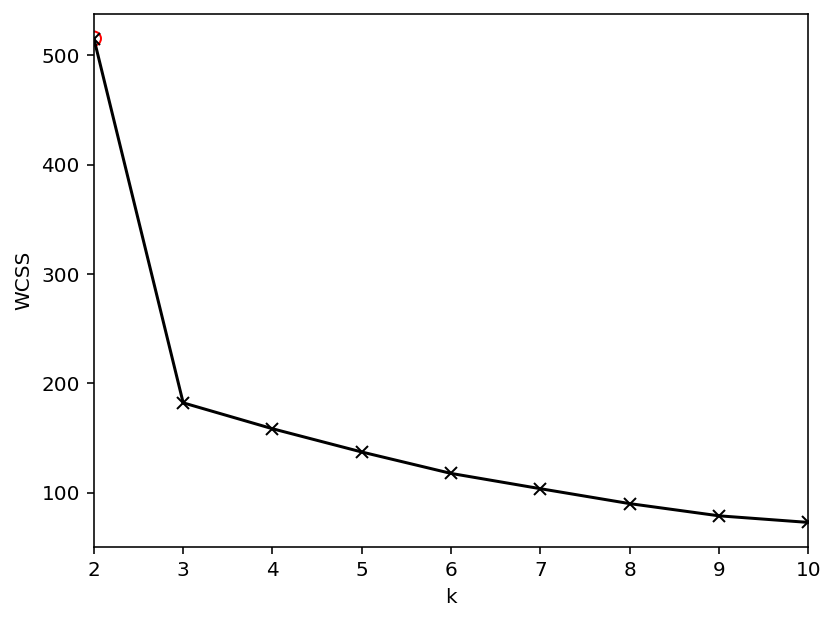

In [33]:
# Clustering Analysis
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

#Elbow Method
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

wcss = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(xy)
    wcss.append(kmeans.inertia_)

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

In the above plot,silhoutte score would suggest 2 or 3 clusters (the values are not too dissimilar) whereas the elbow method suggest more like 5 or 6 clusters.
Best thing to do is to look at the actual data!

## Cluster Visualization

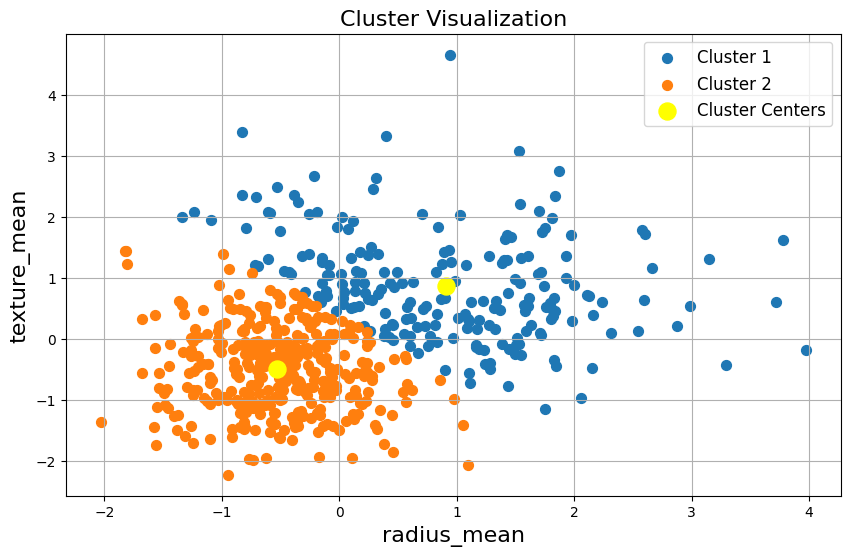

   cluster  count  percentage
0        1    359   63.093146
1        0    210   36.906854


In [34]:
def perform_kmeans(norm , num_clusters=2):
    """
    Perform k-means clustering on scaled/norm data.

    """
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(norm)
    return kmeans, cluster_labels

def plot_clusters(norm, cluster_labels, kmeans, feature_names):
    """
    Plot the clusters along with the centroids on a 2D graph.

    """
    plt.figure(figsize=(10, 6))
    for cluster in set(cluster_labels):
        plt.scatter(norm[cluster_labels == cluster, 0], norm[cluster_labels == cluster, 1], 
                    s=50, label=f'Cluster {cluster+1}')
    # Plotting the centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1] , s=150, c='yellow', label='Cluster Centers')
    
    plt.title('Cluster Visualization', fontsize=16)
    plt.xlabel(feature_names[0] , fontsize=16)
    plt.ylabel(feature_names[1] , fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

def calculate_cluster_distribution(df, cluster_labels):
    """
    Calculate the distribution of data points in each cluster.
    
    Parameters:
        df (pandas.DataFrame): The dataframe with the original data.
        cluster_labels (numpy.ndarray): Labels of each point.
    
    Returns:
        pandas.DataFrame: DataFrame with the count and percentage of each cluster.
    """
    df['cluster'] = cluster_labels
    cluster_distribution = df['cluster'].value_counts().reset_index()
    cluster_distribution.columns = ['cluster', 'count']
    cluster_distribution['percentage'] = (cluster_distribution['count'] / len(df)) * 100
    return cluster_distribution

feature_names = ['radius_mean', 'texture_mean']
kmeans_model, labels = perform_kmeans(norm)
plot_clusters(norm, labels, kmeans_model, feature_names)
cluster_dist = calculate_cluster_distribution(df, labels)


print(cluster_dist)

In [35]:
def plot_fitted_radius_texture(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap='Set3_r', marker='o', label='Data')
    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap , marker='x', s=100, linewidth=3 , label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('radius_mean')
    ax.set_ylabel('texture_mean')
    ax.set_xscale('log')    
    plt.show()
    return

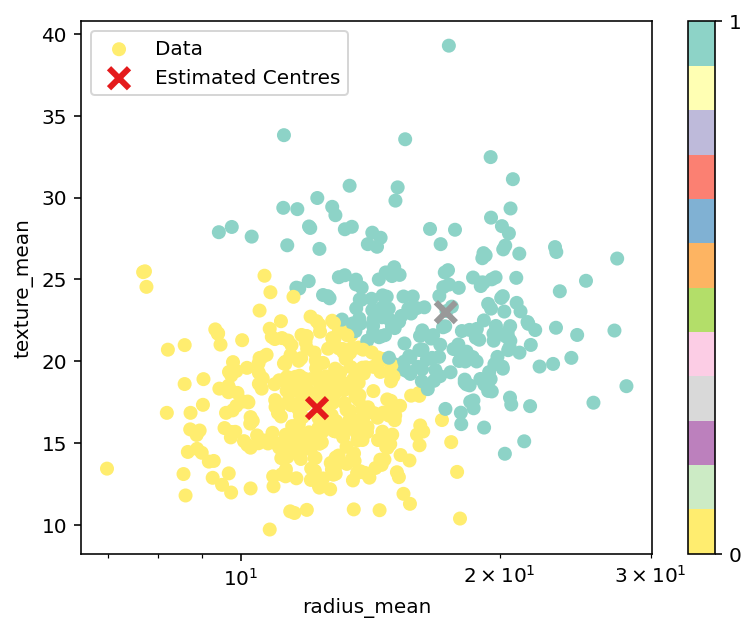

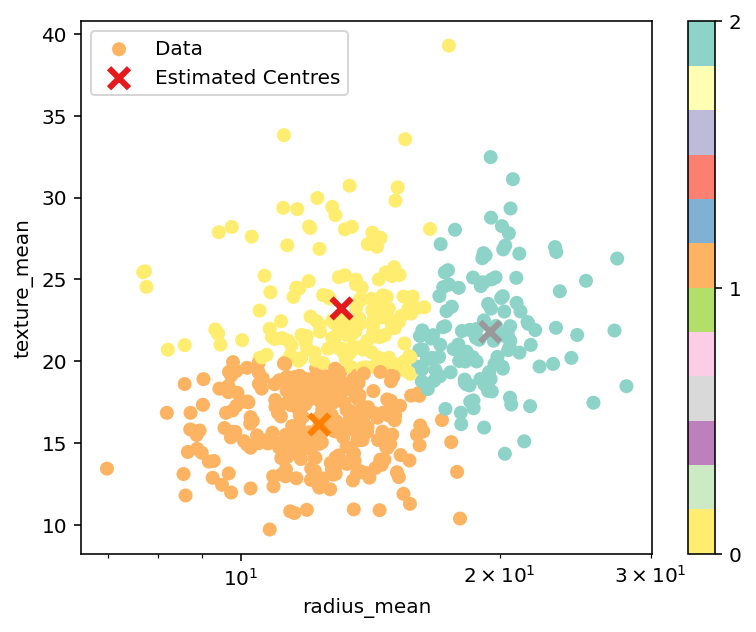

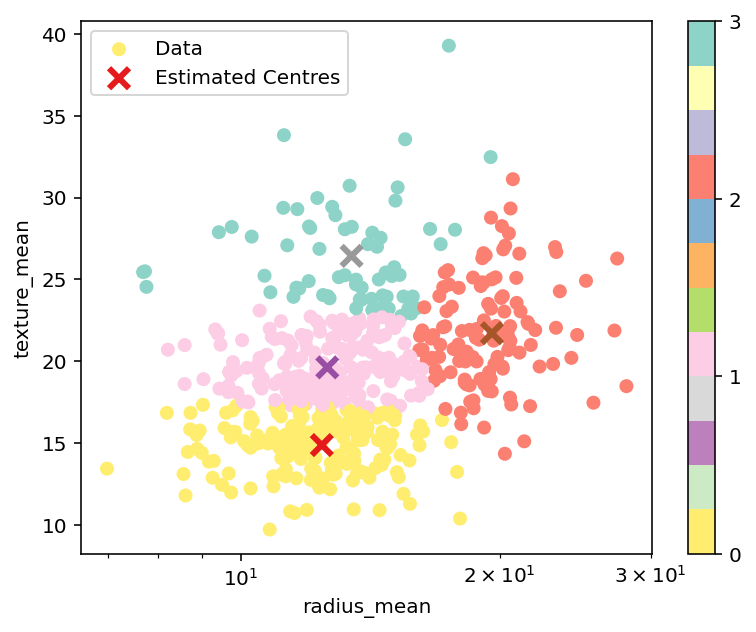

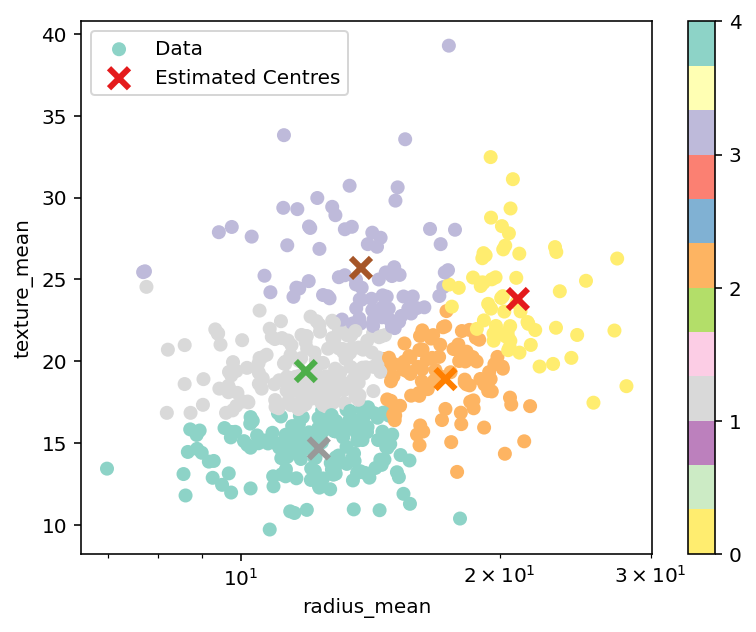

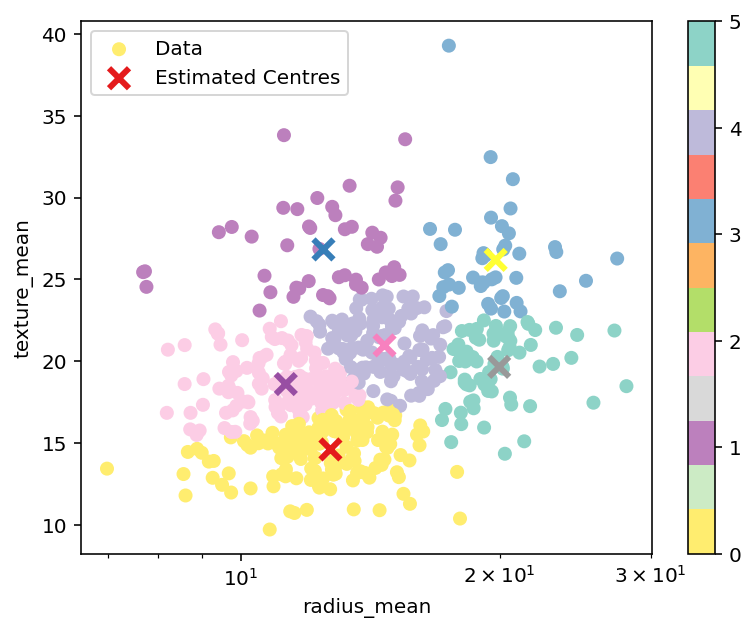

In [36]:
inv_norm = scaler.inverse_transform(norm)  # this is important for plotting data accurately
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    
    plot_fitted_radius_texture(labels, inv_norm, xkmeans, ykmeans, cenlabels)

Either 2 or 3 clusters seem appropriate.

# Fitting

### Linear Regression Analysis

In [37]:
def linear_regression_analysis(data, feature_x, feature_y):
    """
    Perform linear regression analysis on a selected pair of features and print the confidence value.
    """
    # Create figure and axis objects
    
    X = data[[feature_x]]
    y = data[feature_y]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create linear regression object and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluation
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)

    ax = sns.regplot(x=feature_x, y=feature_y, data=df, ci=95, color='b', marker='+')
    plt.title(f'Linear Regression: {feature_x} vs. {feature_y}')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(feature_x , fontsize=14)
    plt.ylabel(feature_y , fontsize=14)
    print(f'R^2 Score: {r2}')
    print(f'MSE: {mse}')

    # Calculate Pearson correlation coefficient and the p-value
    corr_coef, p_value = pearsonr(y_train.values.ravel(), model.predict(X_train))
    print(f'Pearson correlation coefficient: {corr_coef}')
    print(f'P-value (Confidence value): {p_value}')

    # Adding a legend
    legend_labels = ['Regression Line']
    handles, labels = ax.get_legend_handles_labels()
    handles.extend([plt.Line2D([], [], color='blue', marker='+', linestyle='None'),
                    plt.Line2D([], [], color='blue', linestyle='None')])
    plt.legend(handles, legend_labels)
    
    # Displaying metrics on the plot
    plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nR²: {r2:.2f}', transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    # Adjust legend position within the plot
    plt.legend(legend_labels,loc='lower right') 
    plt.savefig('Linear Regression .png', dpi=600)
    plt.show()
    
    # Plotting
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'Linear Regression: {feature_x} vs. {feature_y}' , fontsize=12)
    plt.text(0.09, 0.80, f'MSE: {mse:.2f}\nR²: {r2:.2f}', transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(feature_x , fontsize=14)
    plt.ylabel(feature_y , fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
   
    plt.show()
    return

R^2 Score: 0.9807676735714451
MSE: 0.23244655579671258
Pearson correlation coefficient: 0.9866089172918143
P-value (Confidence value): 0.0


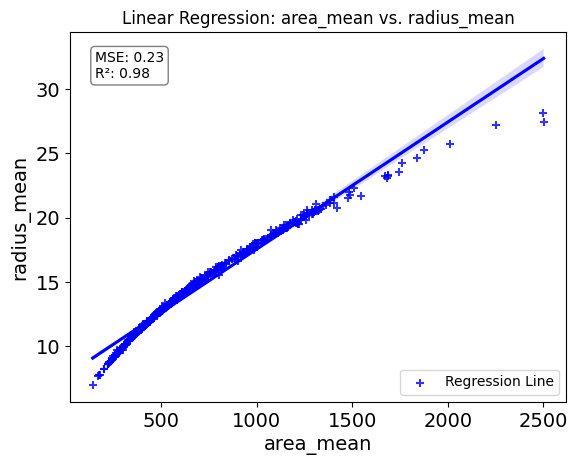

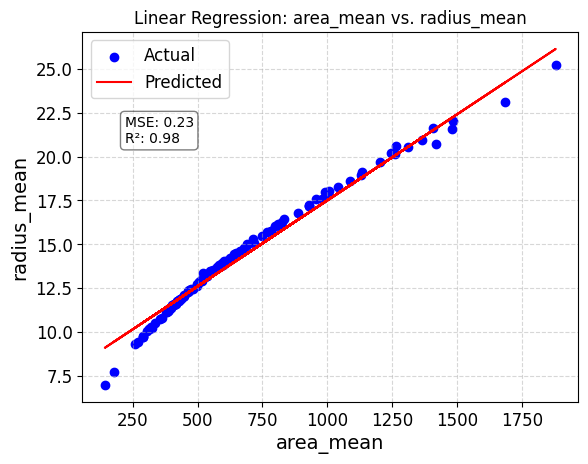

In [38]:
linear_regression_analysis(df, 'area_mean', 'radius_mean')